   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch   Ticket     Fare Cabin Embarked  
0      0    21171   7.2500   NaN        S  
1      0    17599  71.2833   C85        C  
2      0  3101282   7.9250   NaN        S  
3      0   113803  53.1000  C123        S  
4      0   373450   8.0500   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 en

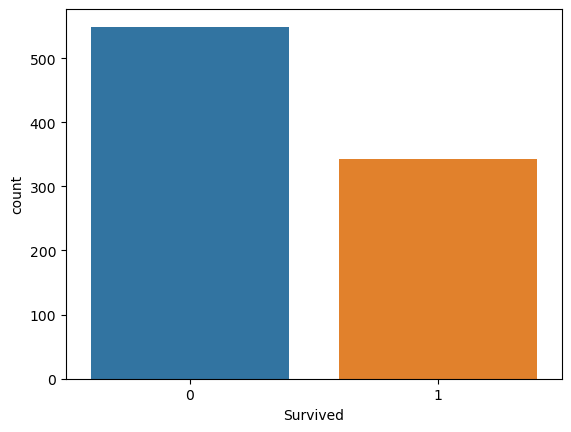

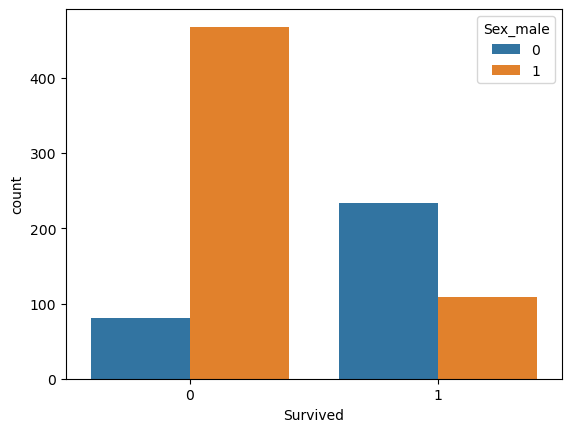

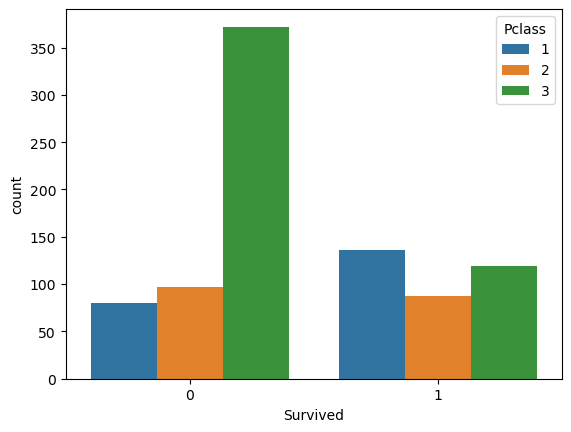

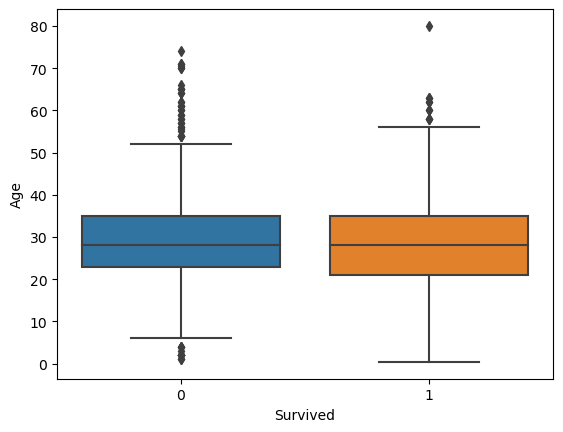

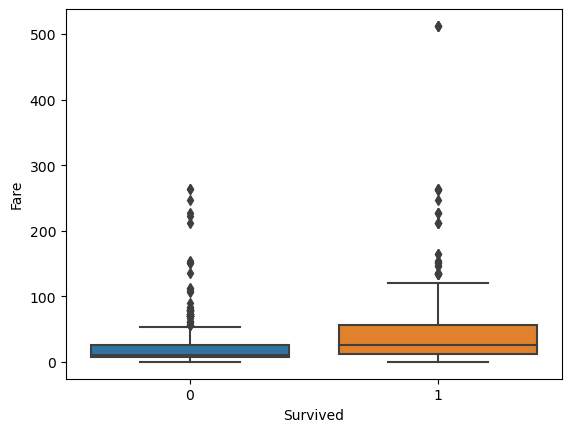

[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


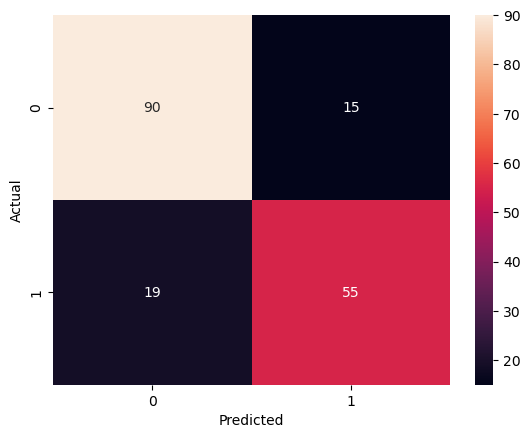

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset
# Assuming the dataset is named 'titanic.csv' and is in the same directory
df = pd.read_csv('data/Titanic-Dataset.csv')

# Step 3: Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Clean the data
# Drop columns that won't be used for prediction
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 5: Perform exploratory data analysis (EDA)
# Visualizing survival based on different features
sns.countplot(x='Survived', data=df)
plt.show()

sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()

# Step 6: Feature engineering
# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build a machine learning model
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
